<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-ajuarezjc/blob/main/Reduccion_dimensiones_ActividadSemana5_A01168444.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alejandro Juarez C
# A01168444
# Ciencia y analitica de datos
# Dra. Maria de la Paz Rico Fernandez

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [49]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= np.dot(np.dot(W,D),Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [50]:
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
values, vectors = eig(A)
print(values) #D
print(vectors) #W

[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]


In [51]:
#Matriz 1

A1 = array([[3,0,2],[3,0,-2],[0,1,1]])
values1, vectors1 = eig(A1)
W1 = vectors1
W1inv = np.linalg.inv(W1)
D1 = np.diag(values1)
A1r = np.dot(np.dot(W1,D1),W1inv)
print("-------Matriz inicial-------")
print(A1)
print("-------Matriz reconstruida-------")
print(np.round(A1r))

-------Matriz inicial-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-------Matriz reconstruida-------
[[ 3.+0.j  0.-0.j  2.-0.j]
 [ 3.-0.j  0.+0.j -2.+0.j]
 [ 0.+0.j  1.-0.j  1.+0.j]]


In [52]:
#Matriz 2

A2 = array([[1,3,8],[2,0,0],[0,0,1]])
values2, vectors2 = eig(A2)
W2 = vectors2
W2inv = np.linalg.inv(W2)
D2 = np.diag(values2)
A2r = np.dot(np.dot(W2,D2),W2inv)
print("-------Matriz inicial-------")
print(A2)
print("-------Matriz reconstruida-------")
print(np.round(A2r))

-------Matriz inicial-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]


In [53]:
#Matriz 3

A3 = array([[5,4,0],[1,0,1],[10,7,1]])
values3, vectors3 = eig(A3)
W3 = vectors3
W3inv = np.linalg.inv(W3)
D3 = np.diag(values3)
A3r = np.dot(np.dot(W3,D3),W3inv)
print("-------Matriz inicial-------")
print(A3)
print("-------Matriz reconstruida-------")
print(np.round(A3r))

-------Matriz inicial-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-------Matriz reconstruida-------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


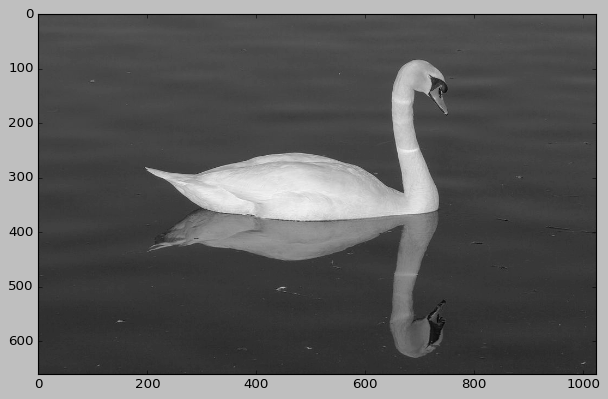

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FD216EBB0D0>


In [54]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [55]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [56]:
U.shape

(660, 660)

In [57]:
V.shape

(1024, 1024)

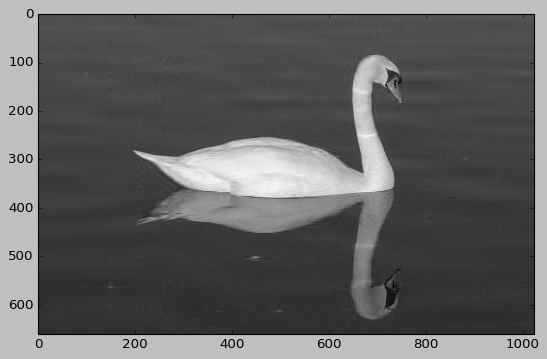

Felicidades la imagen está comprimida


In [58]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

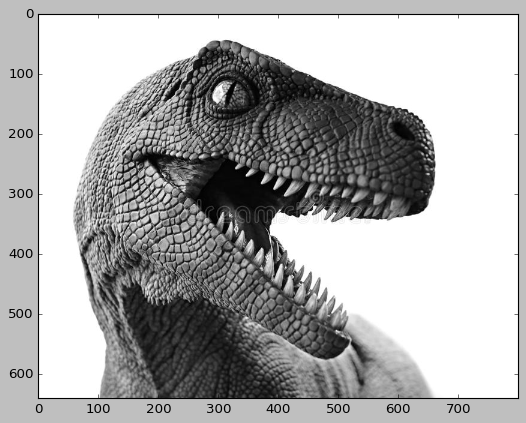

Img1 Size (640, 800)
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x640 at 0x7FD216CA8B10>


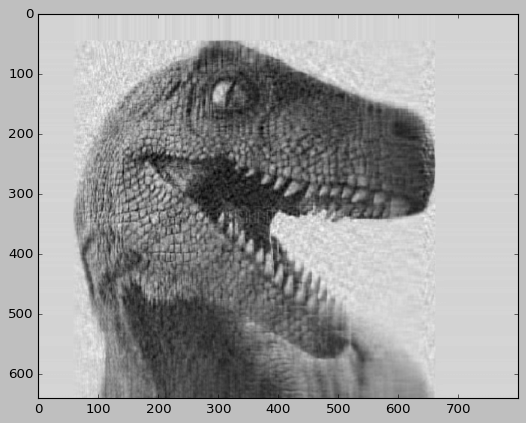

In [59]:
#imagen 1
path1 = "https://thumbs.dreamstime.com/b/primer-del-dinosaurio-22779278.jpg"
img1 = Image.open(urllib.request.urlopen(path1))
imggray1 = img1.convert('LA')
imgmat1 = np.array(list(imggray1.getdata(band=0)),float)

imgmat1.shape = (imggray1.size[1],imggray1.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat1,cmap='gray')
plt.show()
print("Img1 Size",imgmat1.shape)
print(img1)

# Getting SVD values
U1, D1, V1 = np.linalg.svd(imgmat1)
#Setting n-values
n_values1 = 35
#------------------------------
reconstimg1 = np.matrix(U1[:,:n_values1])*np.diag(D1[:n_values1])*np.matrix(V1[:n_values1,:])
plt.imshow(reconstimg1,cmap='gray')
plt.show()

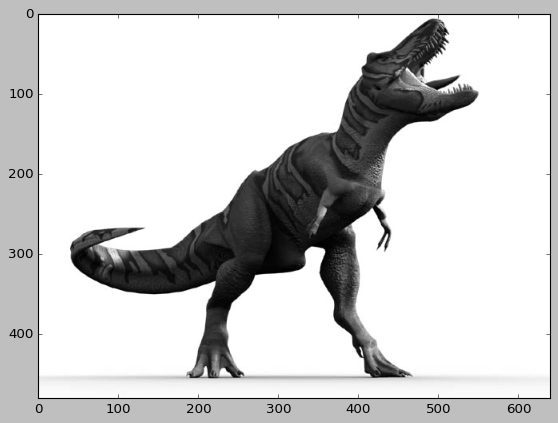

Img2 Size (480, 640)
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480 at 0x7FD216B9B790>


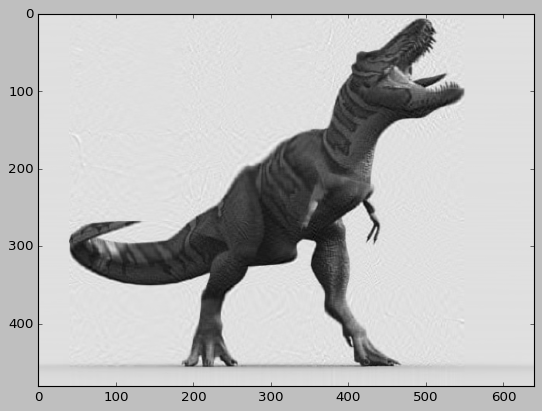

In [60]:
#imagen 2
path2 = "https://upload.wikimedia.org/wikipedia/commons/2/2a/Trex_Roar.jpg"
img2 = Image.open(urllib.request.urlopen(path2))
imggray2 = img2.convert('LA')
imgmat2 = np.array(list(imggray2.getdata(band=0)),float)

imgmat2.shape = (imggray2.size[1],imggray2.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat2,cmap='gray')
plt.show()
print("Img2 Size",imgmat2.shape)
print(img2)

# Getting SVD values
U2, D2, V2 = np.linalg.svd(imgmat2)
#Setting n-values
n_values2 = 80
#------------------------------
reconstimg2 = np.matrix(U2[:,:n_values2])*np.diag(D2[:n_values2])*np.matrix(V2[:n_values2,:])
plt.imshow(reconstimg2,cmap='gray')
plt.show()

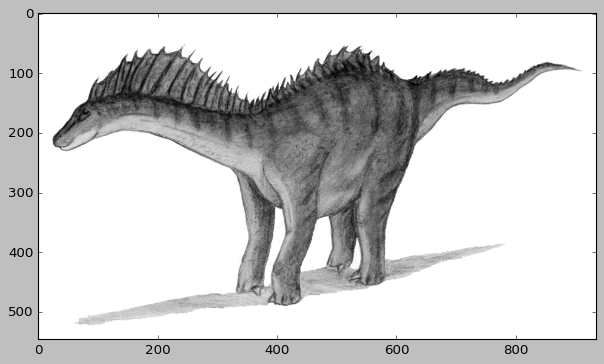

Img3 Size (545, 935)
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=935x545 at 0x7FD216EB80D0>


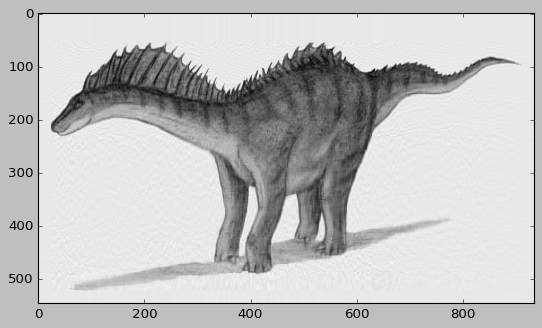

In [61]:
#imagen 3

path3 = "https://upload.wikimedia.org/wikipedia/commons/1/1b/Amargasaurus.jpg"
img3 = Image.open(urllib.request.urlopen(path3))
imggray3 = img3.convert('LA')
imgmat3 = np.array(list(imggray3.getdata(band=0)),float)

imgmat3.shape = (imggray3.size[1],imggray3.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat3,cmap='gray')
plt.show()
print("Img3 Size",imgmat3.shape)
print(img3)

# Getting SVD values
U3, D3, V3 = np.linalg.svd(imgmat3)
#Setting n-values
n_values3 = 75
#------------------------------
reconstimg3 = np.matrix(U3[:,:n_values3])*np.diag(D3[:n_values3])*np.matrix(V3[:n_values3,:])
plt.imshow(reconstimg3,cmap='gray')
plt.show()

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




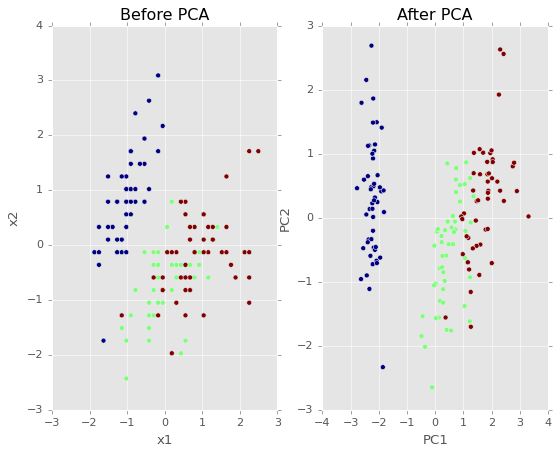

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

In [69]:
print(pca.explained_variance_ratio_) # Prints the variance ratio as [PC1 PC2]

# We transpose the reduced space by PCA and get the covariance matrix. ATTENTION TO DIAGONAL
print(np.cov(X_new.T))
# This prints EIGENVALUES of the covariance matrix 
print(pca.explained_variance_) 
#This values match 

[0.72962445 0.22850762]
[[2.93808505e+00 5.33928780e-16]
 [5.33928780e-16 9.20164904e-01]]
[2.93808505 0.9201649 ]


In [64]:
print(abs( pca.components_ )) # This returns shape (n_components, m_features)
#Row 1: PC1, by feature 
#Row 2: PC2, by feature

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [65]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

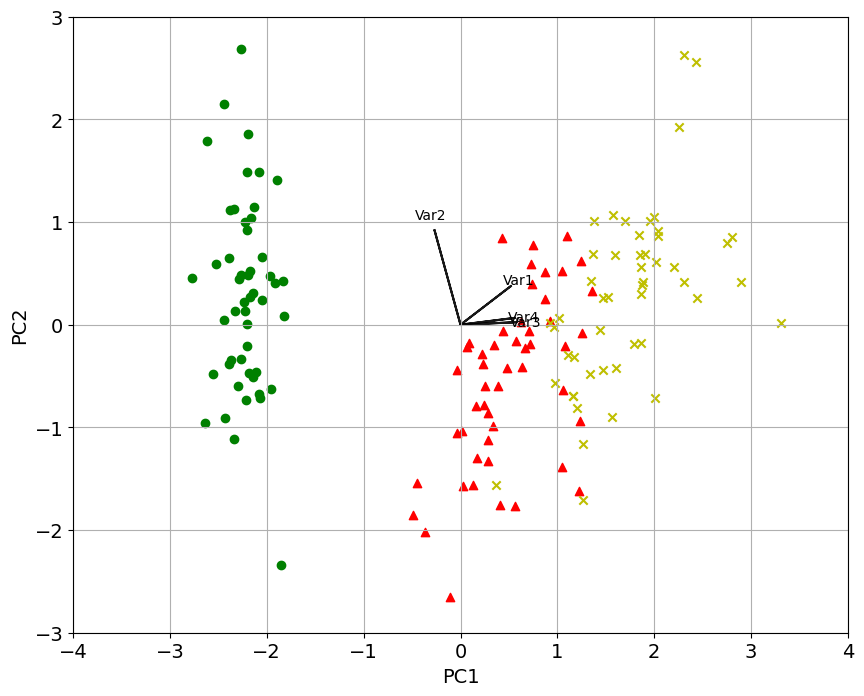

In [66]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [67]:
# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]
0.9628654314027957
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]
-0.42844010433054014

-0.42844010433054014

# Preguntas

## ¿Qué es feature importance y para que nos sirve?
R: Es la importancia que dicho feature ejerce sobre la variable de salida, dada la varianza que esta influye sobre dicha salida. Nos sirve para que, al obtenerla con el método de PCA podamos usarla como una variable de entrada importante (pues ejerce alta influencia en la varianza de salida) y nos permite seleccionar las variables más importantes para desarrollar un modelo con menor costo computacional sin castigar nuestra capacidad de precisión.

## ¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?
La metodología que se aplica al conjunto de datos tanto de forma matemática como su implementación usando librerías de uso común en la industria.
Y aprender una técnica que nos permite obtener modelos más optimizados y más limpios sin tener que castigar nuestros resultados.

## ¿Dónde lo aplicarías o te sería de utilidad este conocimiento?
En ocasiones cuando intentas capturar datos para usarlos en un modelo tiendes a capturar la mayor cantidad de datos pues pensamos que así nuestro modelo será más preciso. Sin embargo podemos terminar usando datos con ruido o con un exceso de información que haga más complicado nuestro trabajo sin que realmente nos traiga un beneficio al resultado.
Al usar la técnica de PCA podemos facilitar nuestro trabajo y generar modelos tan precisos como antes pero con mucho menor costo computacional.